<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-456-Speech/blob/main/DSAI_456_Lab_Quiz_1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

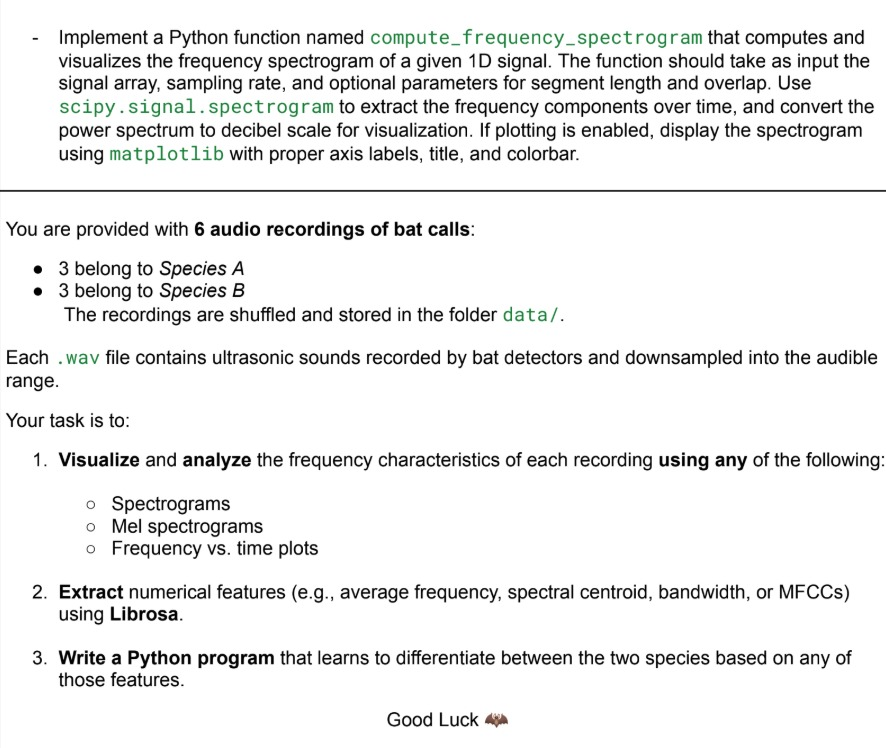

# Imports

In [84]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
import zipfile
import os
from IPython.display import Audio
import numpy as np
from scipy.fft import fftshift
from scipy import signal

In [88]:
extract_dir = 'data'
path = '/content/data.zip'

In [89]:
if not os.path.isdir(extract_dir):
  with zipfile.ZipFile(path):
    z.extractall(path)
print(os.listdir(extract_dir))

['__MACOSX', '6.WAV', '5.WAV', '1.WAV', '4.WAV', '2.WAV', '3.WAV']


In [91]:
files = os.listdir(extract_dir)
files

['__MACOSX', '6.WAV', '5.WAV', '1.WAV', '4.WAV', '2.WAV', '3.WAV']

In [94]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join('data',filename)
    waveform,sample_rate = librosa.load(file_path)
    display(Audio(data = waveform,rate = sample_rate))

In [102]:
def plot_mel_spectogram(waveform,sample_rate):
  # Passing through arguments to the Mel filters
  S = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128,fmax=8000)
  fig, ax = plt.subplots()
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sample_rate,
                          fmax=7000, ax=ax)
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title='Mel-frequency spectrogram')

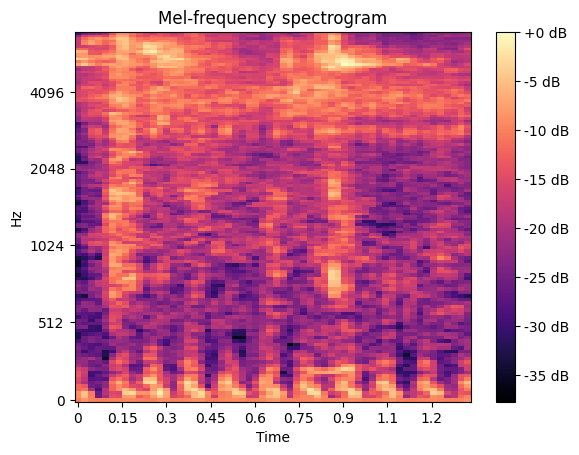

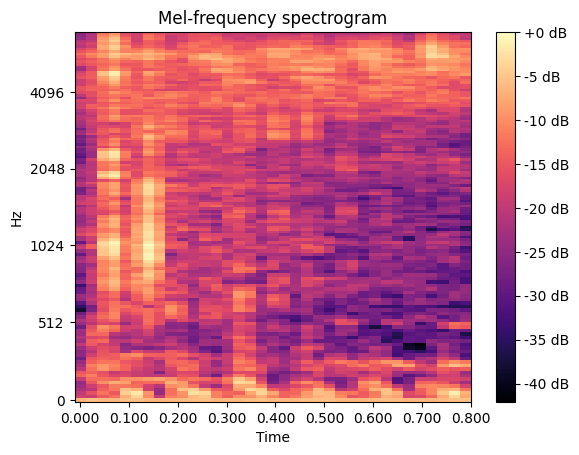

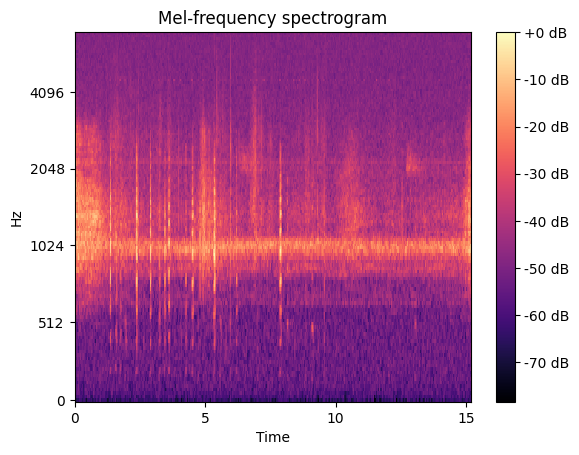

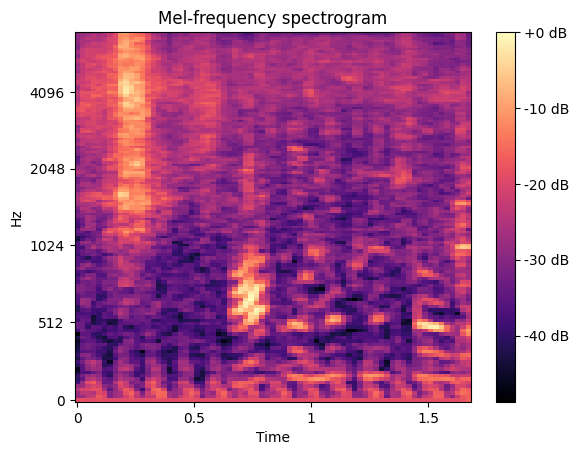

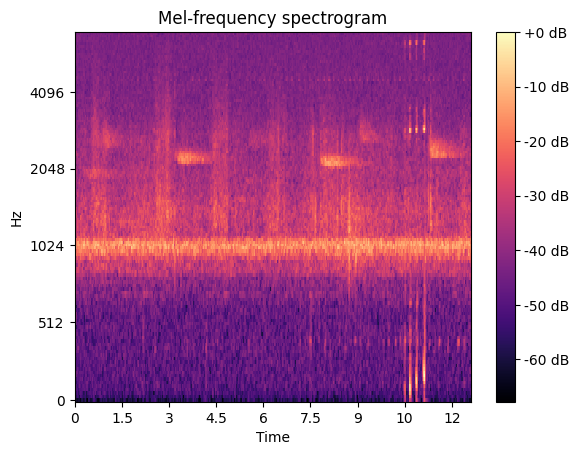

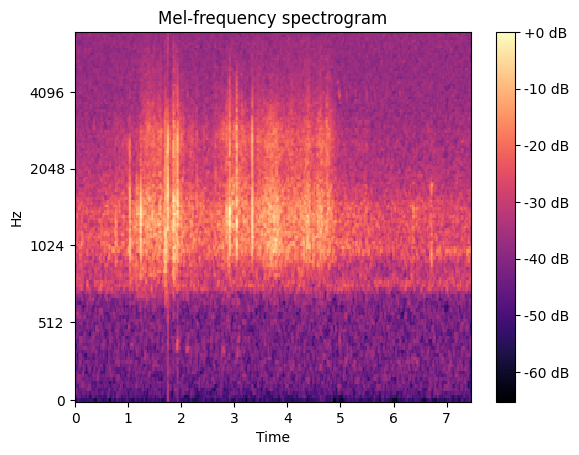

In [103]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join('data',filename)
    waveform,sample_rate = librosa.load(file_path)
    plot_mel_spectogram(waveform,sample_rate)

**Write a detailed comparison** explaining differences in **mel content** between the two spectrograms, differences in **energy distribution over time and frequency**, and **effects of noise or different speaker characteristics** as visible in the spectrograms.

**graph (1,2 ,4,5)** are showing high frequencies as the energy peaks are spread out.

-> high mel frequency

-> high intensity

-> energy is sparse over time

**graph (3 and 5)** are showing that the frequency range is on the horizontal line 1024 hz so this group has lower pith

-> low mel frequency

-> low intensity
-> energy is dense overtime

In [107]:
def plot_waveform(waveform,sample_rate,filename):
  plt.figure(figsize=(10,5))
  librosa.display.waveshow(waveform,sr = sample_rate)
  plt.title(filename)

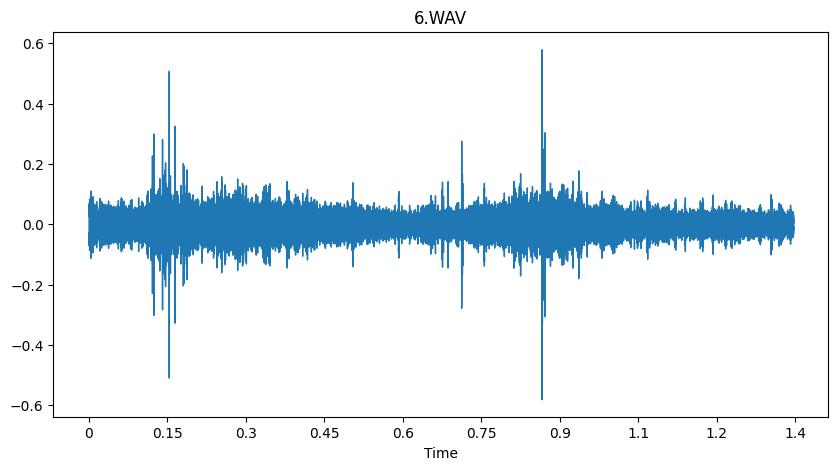

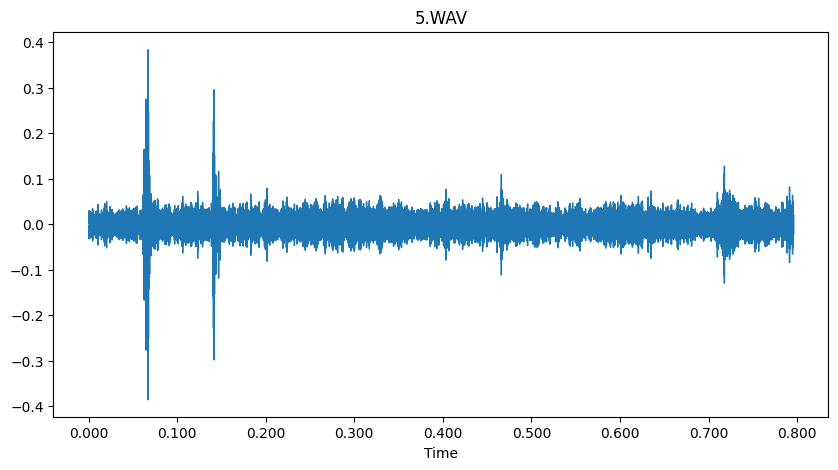

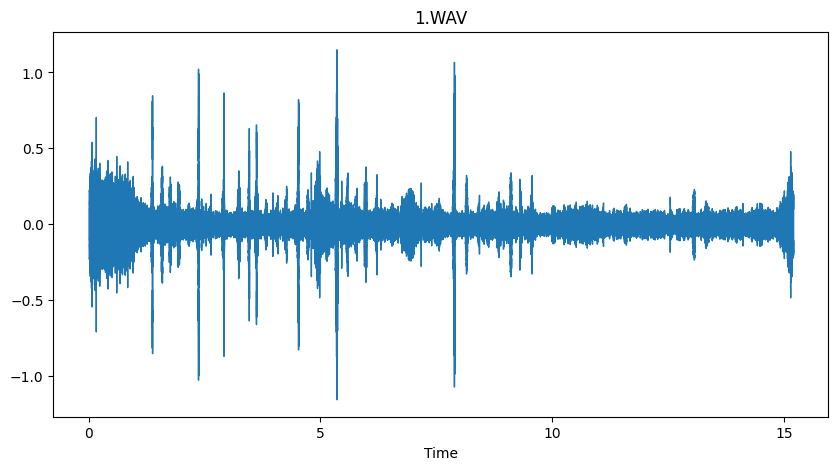

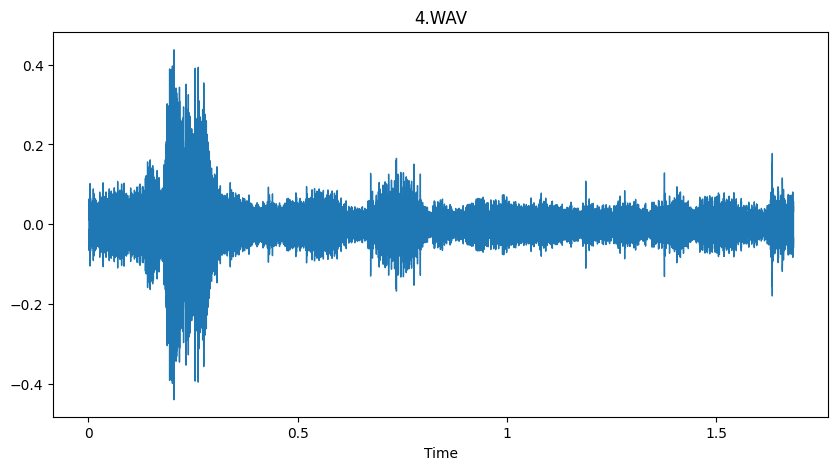

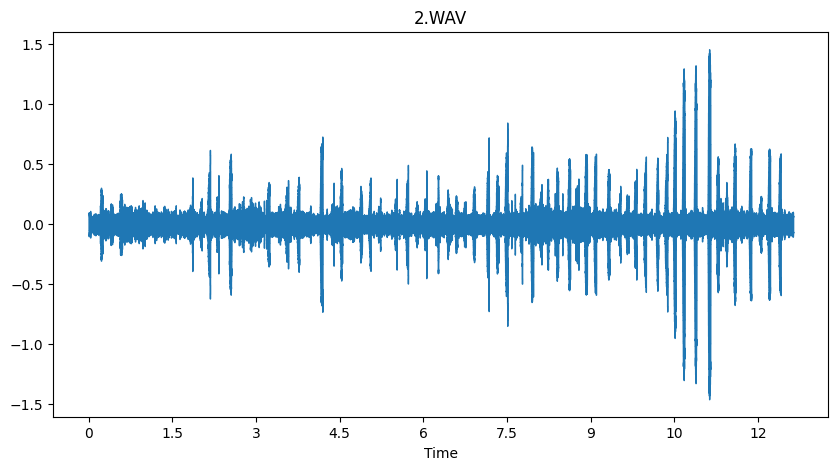

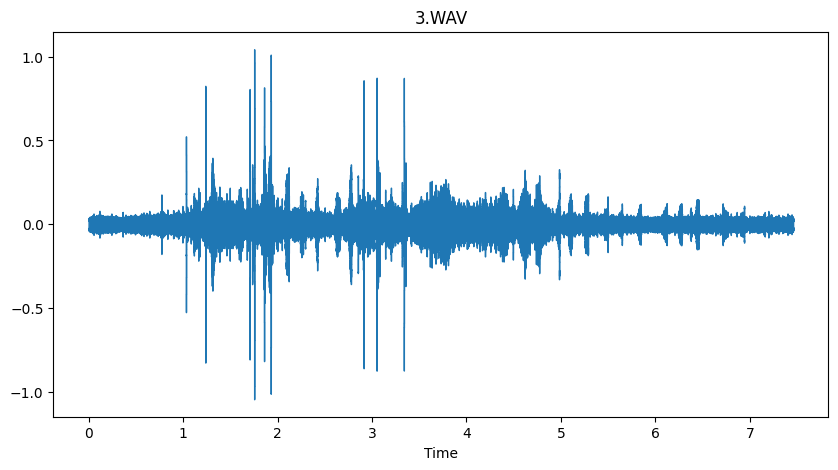

In [108]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join('data',filename)
    waveform,sample_rate = librosa.load(file_path)
    plot_waveform(waveform,sample_rate,filename)

In [120]:
import librosa
import numpy as np
import os


In [ ]:
def extract_features(waveform, sample_rate):
    mfcc = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    features = np.hstack((mfcc_mean, mfcc_std))
    return features

In [121]:
species_A_files = ["1.WAV", "2.WAV", "3.WAV"]
species_B_files = ["4.WAV", "5.WAV", "6.WAV"]

In [139]:


x = []
y_labels = []

for filename in os.listdir('data'):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join('data', filename)

        waveform, sample_rate = librosa.load(file_path)

        feats = extract_features(waveform, sample_rate)
        x.append(feats)

        # Assign species label based on filename
        if filename.upper() in species_A_files:
            y_labels.append("species A")
        else:
            y_labels.append("species B")


In [140]:
x = np.array(x)
y_labels = np.array(y_labels)

print("Feature shape:", x.shape)
print("Labels:", y_labels)


Feature shape: (6, 80)
Labels: ['species B' 'species B' 'species A' 'species B' 'species A' 'species A']


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [142]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [143]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y_labels,test_size=0.20)
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [144]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Explain your logic, which features you used and why you think there's a pattern there.

Frequency Modulated (FM) - Species A Candidate -> Higher $\text{MFCC}_{\text{std}}$ (more spectral variation).

Constant Frequency (CF) - Species B Candidate-> Lower $\text{MFCC}_{\text{std}}$ (less spectral variation).